In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd
import math

In [2]:
df = pd.read_csv('../2.Feature Engineering/new data/modelling_set.csv')
df.describe()

,MemberID,LabCount_total,LabCount_max,LabCount_min,LabCount_ave,LabCount_months,LabCount_std,DrugCount_total,DrugCount_max,DrugCount_min,...,ProcedureGroup_Count_SO,ProcedureGroup_Count_SMCD,AgeAtFirstClaim,Male,Female,MissSex,MissAge,ClaimsTruncated,TARGET,trainset
count,2.184150e+05,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,...,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.0,218415.000000,147473.000000,218415.000000
mean,4.993458e+07,6.471827,3.829439,2.181860,2.918800,1.655033,0.578166,10.387318,2.193531,0.962237,...,0.001699,0.015457,47.750155,0.363524,0.448078,0.188398,0.0,0.054863,0.452951,0.675196
std,2.892479e+07,7.734678,3.440373,2.507408,2.676663,1.906704,1.683426,15.721582,2.271990,1.057978,...,0.047286,0.262061,23.238375,0.481015,0.497298,0.391031,0.0,0.227714,1.573818,0.468303
min,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.478774e+07,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,4.993677e+07,4.000000,4.000000,1.000000,2.666667,1.000000,0.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
75%,7.515525e+07,10.000000,7.000000,3.000000,5.000000,2.000000,1.527525,14.000000,4.000000,1.000000,...,0.000000,0.000000,65.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,9.999882e+07,111.000000,10.000000,10.000000,10.000000,12.000000,6.363961,84.000000,7.000000,7.000000,...,4.000000,23.000000,80.000000,1.000000,1.000000,1.000000,0.0,1.000000,15.000000,1.000000


In [3]:
df_train = df[df['trainset']==1]
df_target = df[df['trainset']==0]

In [4]:
#Count missing data
def count_missing(df):   
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data.head(20))
    return missing_data

count_missing(df_train)

                                         Total  Percent
trainset                                     0      0.0
PlaceSvc_Count_Unknown                       0      0.0
Specialty_Count_Surgery                      0      0.0
CharlsonIndex_range                          0      0.0
DSFS_range                                   0      0.0
no_PrimaryConditionGroup_PlaceSvc            0      0.0
no_ProcedureGroup_PrimaryConditionGroup      0      0.0
no_ProcedureGroup_Specialty                  0      0.0
no_PrimaryConditionGroup_Specialty           0      0.0
CharlsonIndex_std                            0      0.0
CharlsonIndex_ave                            0      0.0
CharlsonIndex_min                            0      0.0
CharlsonIndex_max                            0      0.0
CharlsonIndex_sum                            0      0.0
DSFS_std                                     0      0.0
DSFS_ave                                     0      0.0
DSFS_min                                     0  

,Total,Percent
trainset,0,0.0
PlaceSvc_Count_Unknown,0,0.0
Specialty_Count_Surgery,0,0.0
CharlsonIndex_range,0,0.0
DSFS_range,0,0.0
...,...,...
PrimaryConditionGroup_Count_CANCRB,0,0.0
PrimaryConditionGroup_Count_SKNAUT,0,0.0
PrimaryConditionGroup_Count_HIPFX,0,0.0
PrimaryConditionGroup_Count_GIBLEED,0,0.0


In [5]:
m = (df_train.columns != 'TARGET') & (df_train.columns != 'MemberID') & (df_train.columns != 'Year') & (df_train.columns != 'trainset')
X = df_train.loc[:, m]
y = df_train['TARGET']
y.describe()

count    147473.000000
mean          0.452951
std           1.573818
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: TARGET, dtype: float64

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler(feature_range=(0,1)).fit(X)
#scaler = StandardScaler().fit(X)


new_X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3, random_state=123)

In [9]:
def eval(model, X_test, y_test):
    pred_y = model.predict(X_test) # your predicted y values
    # The root mean square logarithmic error
    pred_y = pred_y.round(0).astype(int)
    msle = np.mean( (np.log(pred_y + 1) - np.log(y_test + 1)) ** 2)
    rmsle = math.sqrt(msle)
    print ("RMSLE: %.2f" % rmsle)
    from sklearn.metrics import r2_score
    r2 = r2_score(pred_y, y_test)
    print ("R2 value: %.2f" % r2)
    return rmsle,r2

In [8]:
# train with Gradient Boosting algorithm
# compute the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2]
for learning_rate in learning_rates:
    model = ensemble.GradientBoostingRegressor(n_estimators=20, learning_rate = learning_rate, 
                                               max_features=14, max_depth = 4, random_state = 0)
    model.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))
    eval(model, X_test, y_test)
    print()

Learning rate:  0.01
Accuracy score (training): 0.017
Accuracy score (validation): 0.015
RMSLE: 0.50
R2 value: -20.66

Learning rate:  0.025
Accuracy score (training): 0.036
Accuracy score (validation): 0.032
RMSLE: 0.51
R2 value: -14.51

Learning rate:  0.05
Accuracy score (training): 0.057
Accuracy score (validation): 0.048
RMSLE: 0.51
R2 value: -12.29

Learning rate:  0.075
Accuracy score (training): 0.072
Accuracy score (validation): 0.058
RMSLE: 0.52
R2 value: -10.32

Learning rate:  0.1
Accuracy score (training): 0.082
Accuracy score (validation): 0.064
RMSLE: 0.52
R2 value: -9.22

Learning rate:  0.15
Accuracy score (training): 0.095
Accuracy score (validation): 0.069
RMSLE: 0.52
R2 value: -7.73

Learning rate:  0.2
Accuracy score (training): 0.106
Accuracy score (validation): 0.072
RMSLE: 0.52
R2 value: -7.11



In [10]:
learning_rates = np.logspace(-10, 1, 400)
score = list()
for learning_rate in learning_rates:
    model = ensemble.GradientBoostingRegressor(n_estimators=20, learning_rate = learning_rate, 
                                               max_features=14, max_depth = 7, random_state = 0)
    model.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))
    rmsle_train, r2_train = eval(model, X_train, y_train)
    rmsle_test, r2_test = eval(model, X_test, y_test)
    score.append([learning_rate, rmsle_train,rmsle_test, r2_train, r2_test])
    print('-')

Learning rate:  1e-10
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  1.0655379505623064e-10
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  1.1353711240885201e-10
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  1.2097810206889038e-10
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  1.2890675894140244e-10
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  1.3735504373605123e-10
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  1.463570118019079

RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  2.54691843897454e-09
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  2.71383825371428e-09
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  2.8916976510203024e-09
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  3.0812135887140084e-09
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  3.2831500125630402e-09
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  3.4983209357750324e-09
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value

Learning rate:  6.087810885914756e-08
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  6.486793534788507e-08
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  6.911924688779366e-08
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  7.364918067322973e-08
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  7.847599703514607e-08
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  8.361915304916317e-08
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  8.9099

RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  1.5505157798326221e-06
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  1.6521334063573686e-06
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  1.7604108438655526e-06
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  1.8757845627201612e-06
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  1.9987196386572483e-06
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  2.1297116275234783e-06
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 v

Learning rate:  3.706144138266228e-05
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  3.949037229576702e-05
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  4.207849036297398e-05
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  4.483622838411906e-05
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  4.777470290335773e-05
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  5.090575902036676e-05
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  5.4242

RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  0.0009439246843247663
Accuracy score (training): 0.002
Accuracy score (validation): 0.002
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  0.0010057875736205835
Accuracy score (training): 0.002
Accuracy score (validation): 0.002
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  0.0010717048298967092
Accuracy score (training): 0.002
Accuracy score (validation): 0.002
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  0.0011419421680558648
Accuracy score (training): 0.002
Accuracy score (validation): 0.002
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  0.001216782717410923
Accuracy score (training): 0.002
Accuracy score (validation): 0.002
RMSLE: 0.52
R2 value: 0.00
RMSLE: 0.52
R2 value: 0.00
-
Learning rate:  0.0012965281629896662
Accuracy score (training): 0.003
Accuracy score (validation): 0.002
RMSLE: 0.52
R2 value: 0.00
RM

RMSLE: 0.51
R2 value: -15.26
RMSLE: 0.51
R2 value: -15.26
-
Learning rate:  0.02256230462970635
Accuracy score (training): 0.034
Accuracy score (validation): 0.029
RMSLE: 0.51
R2 value: -14.96
RMSLE: 0.51
R2 value: -14.96
-
Learning rate:  0.024040991835099643
Accuracy score (training): 0.035
Accuracy score (validation): 0.031
RMSLE: 0.51
R2 value: -14.66
RMSLE: 0.51
R2 value: -14.66
-
Learning rate:  0.025616589169457218
Accuracy score (training): 0.037
Accuracy score (validation): 0.032
RMSLE: 0.51
R2 value: -14.42
RMSLE: 0.51
R2 value: -14.42
-
Learning rate:  0.027295447924020017
Accuracy score (training): 0.039
Accuracy score (validation): 0.034
RMSLE: 0.51
R2 value: -14.22
RMSLE: 0.51
R2 value: -14.22
-
Learning rate:  0.02908433564064045
Accuracy score (training): 0.041
Accuracy score (validation): 0.035
RMSLE: 0.51
R2 value: -13.98
RMSLE: 0.51
R2 value: -13.98
-
Learning rate:  0.03099046339199427
Accuracy score (training): 0.042
Accuracy score (validation): 0.036
RMSLE: 0.51
R

c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -5.77
RMSLE: inf
R2 value: -5.77
-
Learning rate:  0.5061283352022213
Accuracy score (training): 0.133
Accuracy score (validation): 0.064


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.52
R2 value: -5.75
RMSLE: 0.52
R2 value: -5.75
-
Learning rate:  0.539298949012887
Accuracy score (training): 0.135
Accuracy score (validation): 0.064


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 0.52
R2 value: -5.72
RMSLE: 0.52
R2 value: -5.72
-
Learning rate:  0.5746434968715973
Accuracy score (training): 0.138
Accuracy score (validation): 0.054


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


RMSLE: inf
R2 value: -5.41
RMSLE: inf
R2 value: -5.41
-
Learning rate:  0.612304453960519
Accuracy score (training): 0.137
Accuracy score (validation): 0.053


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -5.32
RMSLE: inf
R2 value: -5.32
-
Learning rate:  0.6524336329932608
Accuracy score (training): 0.141
Accuracy score (validation): 0.051


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -5.11
RMSLE: inf
R2 value: -5.11
-
Learning rate:  0.6951927961775591
Accuracy score (training): 0.138
Accuracy score (validation): 0.044


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -5.15
RMSLE: inf
R2 value: -5.15
-
Learning rate:  0.7407543072847155
Accuracy score (training): 0.140
Accuracy score (validation): 0.042


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -4.53
RMSLE: inf
R2 value: -4.53
-
Learning rate:  0.7893018264543568
Accuracy score (training): 0.140
Accuracy score (validation): 0.038


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


RMSLE: inf
R2 value: -4.73
RMSLE: inf
R2 value: -4.73
-
Learning rate:  0.8410310505352605
Accuracy score (training): 0.146
Accuracy score (validation): 0.040


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


RMSLE: inf
R2 value: -4.64
RMSLE: inf
R2 value: -4.64
-
Learning rate:  0.896150501946605
Accuracy score (training): 0.139
Accuracy score (validation): 0.036


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


RMSLE: inf
R2 value: -4.45
RMSLE: inf
R2 value: -4.45
-
Learning rate:  0.9548823692395637
Accuracy score (training): 0.138
Accuracy score (validation): 0.032


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -4.31
RMSLE: inf
R2 value: -4.31
-
Learning rate:  1.0174634027476042
Accuracy score (training): 0.136
Accuracy score (validation): 0.028


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -4.29
RMSLE: inf
R2 value: -4.29
-
Learning rate:  1.0841458689358328
Accuracy score (training): 0.130
Accuracy score (validation): 0.015


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -4.14
RMSLE: inf
R2 value: -4.14
-
Learning rate:  1.1551985672964782
Accuracy score (training): 0.133
Accuracy score (validation): 0.001


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -3.83
RMSLE: inf
R2 value: -3.83
-
Learning rate:  1.2309079138896017
Accuracy score (training): 0.122
Accuracy score (validation): -0.008


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -3.79
RMSLE: inf
R2 value: -3.79
-
Learning rate:  1.3115790958968503
Accuracy score (training): 0.122
Accuracy score (validation): -0.009


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -3.55
RMSLE: inf
R2 value: -3.55
-
Learning rate:  1.3975373018422867
Accuracy score (training): 0.117
Accuracy score (validation): -0.061


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -2.96
RMSLE: inf
R2 value: -2.96
-
Learning rate:  1.4891290324394058
Accuracy score (training): 0.112
Accuracy score (validation): -0.051


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -2.81
RMSLE: inf
R2 value: -2.81
-
Learning rate:  1.5867234973483146
Accuracy score (training): 0.104
Accuracy score (validation): -0.081


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -2.84
RMSLE: inf
R2 value: -2.84
-
Learning rate:  1.6907141034735782
Accuracy score (training): 0.084
Accuracy score (validation): -0.123


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -2.40
RMSLE: inf
R2 value: -2.40
-
Learning rate:  1.8015200408020238
Accuracy score (training): 0.069
Accuracy score (validation): -0.069


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -2.96
RMSLE: inf
R2 value: -2.96
-
Learning rate:  1.919587972173111
Accuracy score (training): 0.037
Accuracy score (validation): -0.168


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -2.11
RMSLE: inf
R2 value: -2.11
-
Learning rate:  2.0453938337933906
Accuracy score (training): -0.039
Accuracy score (validation): -0.187


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -2.18
RMSLE: inf
R2 value: -2.18
-
Learning rate:  2.179444753752979
Accuracy score (training): -0.884
Accuracy score (validation): -0.981


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -0.97
RMSLE: inf
R2 value: -0.97
-
Learning rate:  2.32228109627772
Accuracy score (training): -85.662
Accuracy score (validation): -79.261


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -0.04
RMSLE: inf
R2 value: -0.04
-
Learning rate:  2.4744786399573475
Accuracy score (training): -4601.742
Accuracy score (validation): -4263.469


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -0.00
RMSLE: inf
R2 value: -0.00
-
Learning rate:  2.6366508987303554
Accuracy score (training): -289681.328
Accuracy score (validation): -268912.763
RMSLE: inf
R2 value: -0.00
RMSLE: inf
R2 value: -0.00
-


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


Learning rate:  2.809451594981406
Accuracy score (training): -19083341.894
Accuracy score (validation): -17639345.024


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -0.00
RMSLE: inf
R2 value: -0.00
-
Learning rate:  2.9935772947204904
Accuracy score (training): -860181926.593
Accuracy score (validation): -789509947.695


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: inf
R2 value: -0.00
RMSLE: inf
R2 value: -0.00
-
Learning rate:  3.1897702154663117
Accuracy score (training): -33604087041.060
Accuracy score (validation): -30737385613.300


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 12.19
R2 value: -0.00
RMSLE: 12.19
R2 value: -0.00
-
Learning rate:  3.3988212181526603
Accuracy score (training): -1565451895872.470
Accuracy score (validation): -1438278678662.370


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 14.08
R2 value: -0.00
RMSLE: 14.08
R2 value: -0.00
-
Learning rate:  3.6215729951180675
Accuracy score (training): -54055966391190.719
Accuracy score (validation): -49844507447969.070


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 15.88
R2 value: -0.00
RMSLE: 15.88
R2 value: -0.00
-
Learning rate:  3.858923467029899
Accuracy score (training): -1679086662348495.500
Accuracy score (validation): -1548861607758513.500


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 17.55
R2 value: -0.00
RMSLE: 17.55
R2 value: -0.00
-
Learning rate:  4.111829402435829
Accuracy score (training): -54535524721896120.000
Accuracy score (validation): -50112316897368248.000


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 19.32
R2 value: -0.00
RMSLE: 19.32
R2 value: -0.00
-
Learning rate:  4.3813102745333055
Accuracy score (training): -1543727491797402368.000
Accuracy score (validation): -1422968053577062144.000


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 21.03
R2 value: -0.00
RMSLE: 21.03
R2 value: -0.00
-
Learning rate:  4.668452370703794
Accuracy score (training): -38393556464377987072.000
Accuracy score (validation): -35233901530138951680.000
RMSLE: 20.47
R2 value: -6.20
RMSLE: 20.47
R2 value: -6.20
-


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


Learning rate:  4.974413171377441
Accuracy score (training): -1141717853642238722048.000
Accuracy score (validation): -1051388608111062155264.000


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 20.99
R2 value: -27.93
RMSLE: 20.99
R2 value: -27.93
-
Learning rate:  5.300426015879662
Accuracy score (training): -27521425907689614999552.000
Accuracy score (validation): -25342466381502797053952.000


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 20.09
R2 value: -1602.91
RMSLE: 20.09
R2 value: -1602.91
-
Learning rate:  5.647805074067546
Accuracy score (training): -651273962433910405070848.000
Accuracy score (validation): -600529011207955988611072.000


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 20.90
R2 value: -5733.19
RMSLE: 20.90
R2 value: -5733.19
-
Learning rate:  6.017950643797328
Accuracy score (training): -16853050740235867349057536.000
Accuracy score (validation): -15509056951489498254934016.000


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: nan
R2 value: 0.00
RMSLE: nan
R2 value: 0.00
-
Learning rate:  6.412354795576917
Accuracy score (training): -327806627460519009730953216.000
Accuracy score (validation): -302568174791433668077289472.000


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: 21.04
R2 value: -15362.26
RMSLE: 21.04
R2 value: -15362.26
-
Learning rate:  6.832607387157405
Accuracy score (training): -5926626613263738998991355904.000
Accuracy score (validation): -5452369572828129752470519808.000


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: nan
R2 value: 0.00
RMSLE: nan
R2 value: 0.00
-
Learning rate:  7.2804024723085465
Accuracy score (training): -118457001288337567483535818752.000
Accuracy score (validation): -108999095452858165929313304576.000


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: nan
R2 value: 0.00
RMSLE: nan
R2 value: 0.00
-
Learning rate:  7.757545129612398
Accuracy score (training): -2409465230822479143639153901568.000
Accuracy score (validation): -2218417323507361707191802265600.000


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: nan
R2 value: 0.00
RMSLE: nan
R2 value: 0.00
-
Learning rate:  8.265958738801796
Accuracy score (training): -44573261805636786950827375853568.000
Accuracy score (validation): -41040290190309072681098056564736.000


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: nan
R2 value: 0.00
RMSLE: nan
R2 value: 0.00
-
Learning rate:  8.807692733975452
Accuracy score (training): -803562127411482722422791279214592.000
Accuracy score (validation): -740886543621075121518491048345600.000


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: nan
R2 value: 0.00
RMSLE: nan
R2 value: 0.00
-
Learning rate:  9.38493086494272
Accuracy score (training): -13145814242476295183661958585909248.000
Accuracy score (validation): -12143006967060232263866803873120256.000


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


RMSLE: nan
R2 value: 0.00
RMSLE: nan
R2 value: 0.00
-
Learning rate:  10.0
Accuracy score (training): -263002775993908141791371298649145344.000
Accuracy score (validation): -244060497000730917683572491440619520.000
RMSLE: nan
R2 value: 0.00
RMSLE: nan
R2 value: 0.00
-


c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
c:\users\radio_pc\.conda\envs\bml3.6\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [12]:
df_score = pd.DataFrame(score,columns=['learning_rate','rmsle_train','rmsle_test','r2_train','r2_test'])

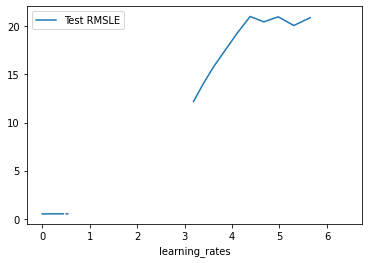

In [17]:
import matplotlib.pyplot as plt

plt.plot(learning_rates, df_score['rmsle_test'],label='Test RMSLE')
plt.xlabel('learning_rates')
plt.legend()
plt.show()

In [18]:
df_score.to_csv('../5.Result/GDR_score.csv',index=False)

In [20]:
model = ensemble.GradientBoostingRegressor(n_estimators=1000, learning_rate = 0.00523960135300263, 
                                               max_features=14, max_depth = 7, random_state = 0)
model.fit(X_train, y_train)
rmsle_train, r2_train = eval(model, X_train, y_train)
rmsle_test, r2_test = eval(model, X_test, y_test)

RMSLE: 0.48
R2 value: -3.69
RMSLE: 0.51
R2 value: -6.37


In [ ]:
from sklearn import linear_model

parameters = {
     "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
     "min_samples_split": [25,50,60],
     "min_samples_leaf": np.linspace(0.1, 0.5, 12),
     "max_depth":[5,8,12],
     "max_features":["log2","sqrt"],
     "n_estimators":[100, 200, 500]
     }

best_model = GridSearchCV(ensemble.GradientBoostingRegressor(learning_rate=0.005,
                                                        n_estimators=500,max_depth=4,min_samples_split=50, 
                                                        verbose =1), param_grid=parameters, cv=10, n_jobs=-1)

best_model.fit(X_train, y_train)
eval(best_model, X_test, y_test)

In [ ]:
best_model.best_params_, best_model.best_estimator_